In [1]:
import pandas as pd
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# Load data (adjust path and delimiter as needed)
df = pd.read_csv("D:/Database/database/datasets/merged_reviews.csv", encoding='utf-8')

C:\Users\ramya\AppData\Local\Temp\ipykernel_10304\2702246953.py:15: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/Database/database/datasets/merged_reviews.csv", encoding='utf-8')


In [2]:
df

,review_id,platform,asin,book_name,author,reviewer_name,review_title,review_text,rating,review_date,review_timestamp,verified,helpful
0,48235e132322f1f1d38273eb33bde48f,Amazon,B0033UV8HI,Not Available,Not Available,Ridley,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",3,2010-09-02,1283385600,False,"[8, 10]"
1,ef97bbe96ff2ffe7dfb0852e39a0e1ea,Amazon,B002HJV4DE,Not Available,Not Available,Holly Butler,Terrific menage scenes!,Great short read. I didn't want to put it dow...,5,2013-10-08,1381190400,False,"[1, 1]"
2,ffa408e5333fda43220110b396f469d9,Amazon,B002ZG96I4,Not Available,Not Available,Merissa,Snapdragon Alley,I'll start by saying this is the first of four...,3,2014-04-11,1397174400,False,"[0, 0]"
3,d5b5ad9a44016bc335af15c715efa85d,Amazon,B002QHWOEU,Not Available,Not Available,Cleargrace,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,3,2014-07-05,1404518400,False,"[1, 3]"
4,6f54882f555c3a31bf0bc5a2d007e1e8,Amazon,B001A06VJ8,Not Available,Not Available,Rjostler,Book,I did not expect this type of book to be in li...,4,2012-12-31,1356912000,False,"[0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79462,0bbafa54ee3f1f8485989d717f8e0285,CustomerReviews,1492646318,How to Catch an Elf,Adam Wallace,Carol Mccoy,A cute Christmas book for STEM,Definitely a cute read aloud book to get kids ...,5,2023-09-04,"Reviewed in the United States September 4, 2023",1.0,0
79463,7898c8d5febb0343f769a569dbd086a8,CustomerReviews,1501161938,The Seven Husbands of Evelyn Hugo: A Novel,Morgan Housel,Chelscey,Hollywood hasn't changed much,Starting at the young age of fourteen and endi...,5,2022-04-25,"Reviewed in the United States April 25, 2022",1.0,0
79464,ac52669eb95d9637b39a39d44bd48fa9,CustomerReviews,385534264,"The Wager: A Tale of Shipwreck, Mutiny and Murder",David Grann,bayrider,Very Good Narrative Nonfiction,I really liked this work of narrative nonficti...,4,2023-09-09,"Reviewed in the United States September 9, 2023",1.0,0
79465,3a90ac5bf4884a7e047b1c8cf2bfd8dd,CustomerReviews,B0B6XFT4RH,Interesting Facts For Curious Minds: 1572 Rand...,Jordan Moore,Amazon Customer,great book!!!!,Amazing facts!!!! I couldn’t put it down. This...,5,2023-10-01,"Reviewed in the United States October 1, 2023",1.0,0


In [3]:
# Combine title and text if needed
df['combined_review'] = df['review_title'].fillna('') + " " + df['review_text'].fillna('')


In [4]:
# Drop rows where review text is empty
df = df[df['combined_review'].str.strip().astype(bool)]

In [5]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [6]:
df['cleaned'] = df['combined_review'].apply(clean_text)

In [7]:
# Stopword removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['no_stopwords'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Lemmatization (more appropriate than stemming for reviews)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['no_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Tokenization
nltk.download('punkt')
df['tokens'] = df['lemmatized'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Frequency analysis
all_tokens = [token for tokens in df['tokens'] for token in tokens]
freq_dist = Counter(all_tokens)


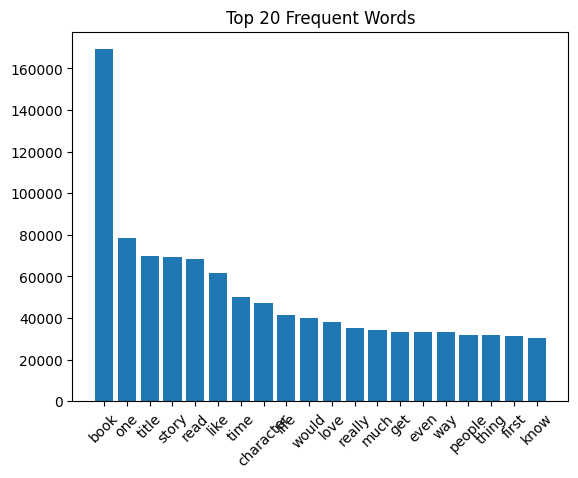

In [11]:
# Plotting top 20 words
common = freq_dist.most_common(20)
labels, counts = zip(*common)
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words")
plt.show()

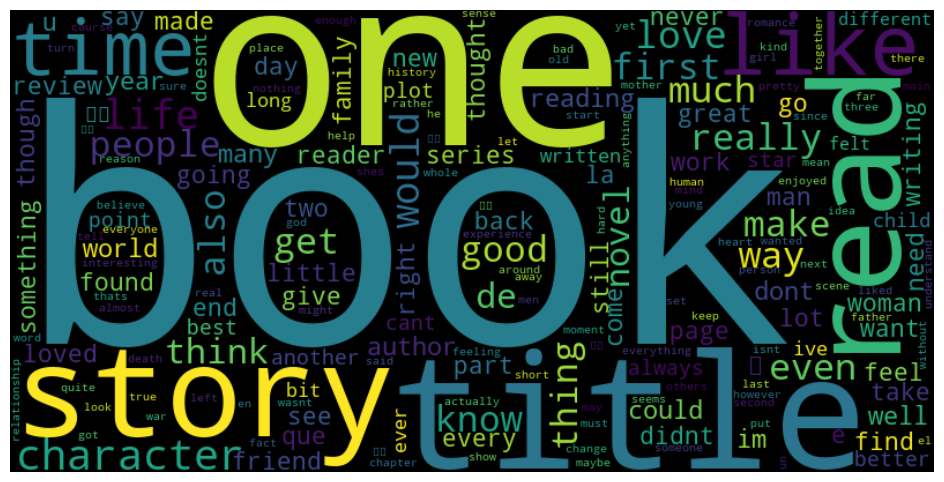

In [12]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [13]:
# Save cleaned data
df.to_csv("D:/Database/database/cleaned_Datasets/cleaned_book_reviews.csv", index=False)